# Data Science for Good: City of Los Angeles

You can find the official starter kernel with helpful code snippets [in this link](https://www.kaggle.com/bbailey/data-science-for-good-city-of-la-starter-kernel), or below you can find some functions for previewing the data files. 

![](https://i.imgur.com/esrWigW.jpg)

Photo by [Sasha • Stories](https://unsplash.com/photos/5c1kq_XmPEY) on Unsplash

# Data Science for Good: City of Los Angeles
**Help the City of Los Angeles to structure and analyze its job descriptions**

The City of Los Angeles faces a big hiring challenge: 1/3 of its 50,000 workers are eligible to retire by July of 2020. The city has partnered with Kaggle to create a competition to improve the job bulletins that will fill all those open positions.

# Problem Statement

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.  

The goal is to convert a folder full of plain-text job postings into a structured CSV file and then to use this data to: (1) identify language that can negatively bias the pool of applicants; (2) improve the diversity and quality of the applicant pool; and/or (3) make it easier to determine which promotions are available to employees in each job class.

# How to Participate
1. Accept the Rules
 - Accept the [competition rules][1].  
2. Make Your Submission
 - Follow the [submission instructions][2].

WIth your help, Los Angeles will overcome a wave of retirements and fill those jobs with a strong and diverse workforce. Good luck and happy Kaggling!


  [1]: https://www.kaggle.com/c/data-science-for-good-city-of-los-angeles/rules
  [2]: https://www.kaggle.com/c/data-science-for-good-city-of-los-angeles/overview/submission-instructions

In [1]:
# Import python packages
import os
from os import walk
import shutil
from shutil import copytree, ignore_patterns
from PIL import Image
from wand.image import Image as Img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Define helper function for plotting word clouds
def wordCloudFunction(df,column,numWords):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Define helper function for plotting word bar graphs
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

# Preview the data folder
inputFolder = '../input/cityofla/CityofLA/Additional data/PDFs'
for root, directories, filenames in os.walk(inputFolder):
    for filename in filenames: 
        print(os.path.join(root,filename))
        
# Reorganize the data folder
outputFolder = '/kaggle/working/pdfs/'
shutil.copytree(inputFolder,outputFolder,ignore=ignore_patterns('*.db'))
for root, directories, filenames in os.walk(outputFolder, topdown=False):
    for file in filenames:
        try:
            shutil.move(os.path.join(root, file), outputFolder)
        except OSError:
            pass
shutil.rmtree(os.path.join(outputFolder,'2018'),
              os.path.join(outputFolder,'2017'),
              os.path.join(outputFolder,'2016'))
shutil.rmtree(os.path.join(outputFolder,'2015'),
              os.path.join(outputFolder,'2014'))
print(os.listdir(outputFolder))

../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/BUILDING INSPECTOR 4211 REVISED 090115.pdf
../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/Thumbs.db
../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/HARBOR PLANNING AND RESEARCH DIRECTOR 9234 092515 REVISED.pdf
../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/BUILDING MECHANICAL INSPECTOR 4251 REVISED 090115.pdf
../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/BUILDING MECHANICAL INSPECTOR 4251 REV 2.pdf
../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/BUILDING MECHANICAL INSPECTOR 4251 REV.pdf
../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/CONSTRUCTION EQUIPMENT SERVICE WORKER 3541 rev.pdf
../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/092515/REHABILITATION CONSTRUCTION SPECIALIST 1569.pdf
../input/cityofla/CityofLA/Additional data/PDFs/2015/september 2015/092515/SECRETARY LEGAL  1

In [2]:
files = next(os.walk('/kaggle/working/pdfs/'))[2] 
print("Total Number of Files in CityofLA Dataset: ", len(files))

Total Number of Files in CityofLA Dataset:  1456


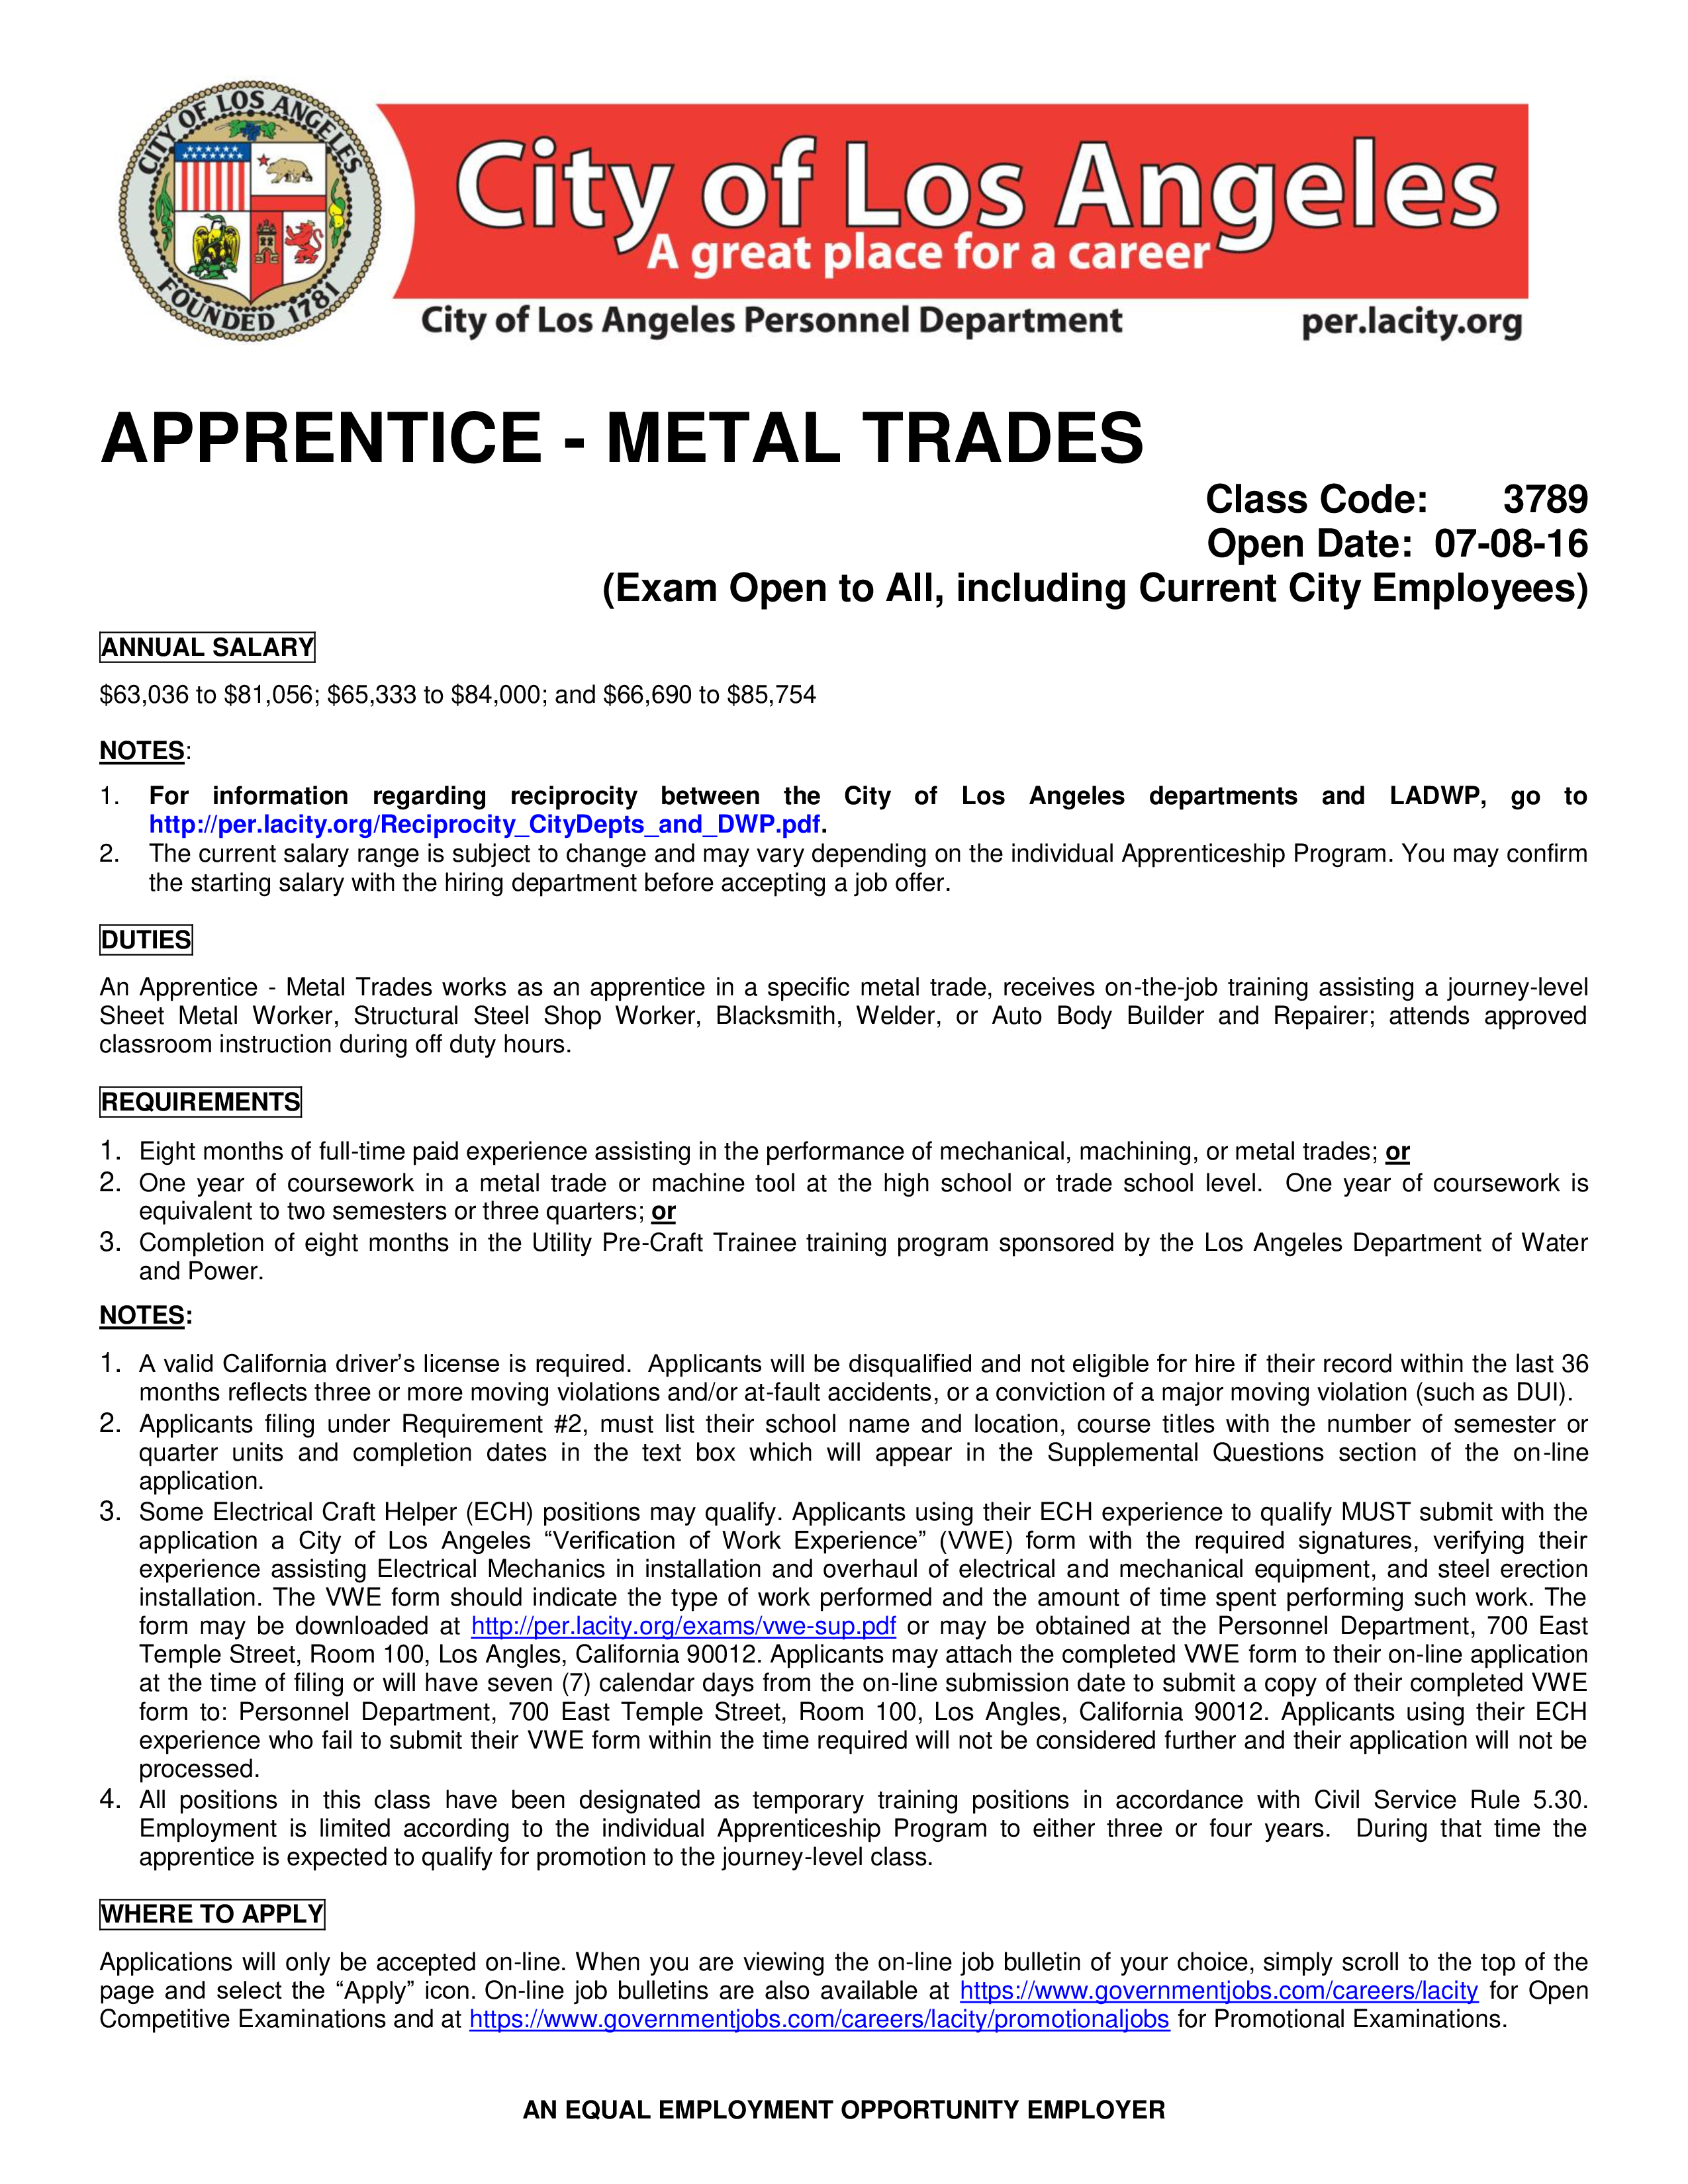

In [3]:
# Preview a PDF file
pdf = os.path.join(outputFolder,'APPRENTICE - METAL TRADES 3789.pdf')
Img(filename=pdf, resolution=300)

In [4]:
# Parse a PDF file
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/test_jpg.jpg')
!pip install tika
import tika
from tika import parser
tika.initVM()
parsed = parser.from_file('/kaggle/working/test_jpg-1.jpg')
text = parsed["content"]
df = pd.DataFrame([text.split('\n')])
df.drop(df.iloc[:, 1:46], inplace=True, axis=1)

  Stored in directory: /tmp/.cache/pip/wheels/b4/db/8a/3a3f0c0725448eaa92703e3dda71e29dc13a119ff6c1036848
Successfully built tika
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


2019-05-08 03:00:10,032 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar to /tmp/tika-server.jar.
2019-05-08 03:00:12,602 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar.md5 to /tmp/tika-server.jar.md5.
2019-05-08 03:00:12,977 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


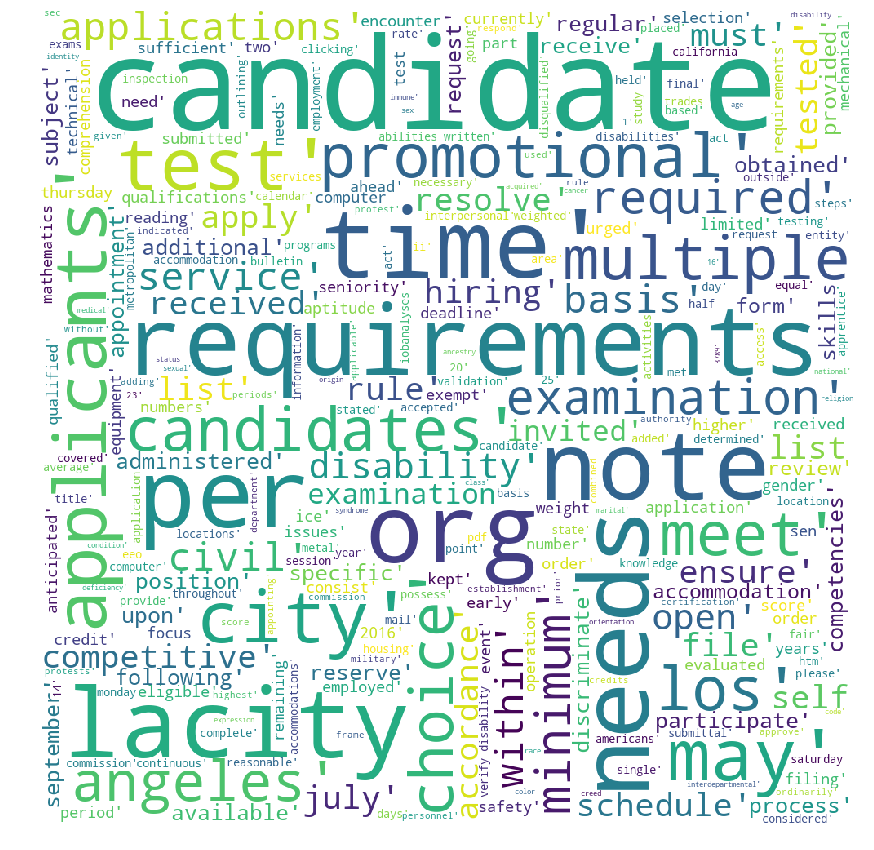

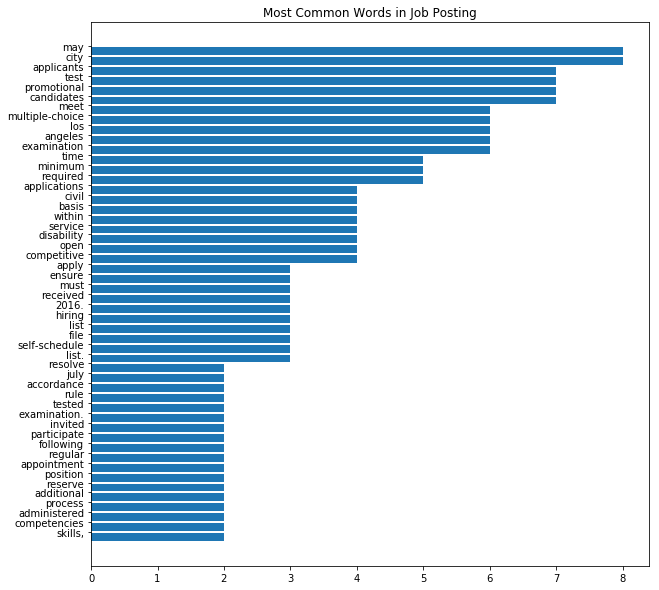

In [5]:
# Make a Word Cloud
plt.figure(figsize=(15,15))
wordCloudFunction(df.T,0,10000000)

plt.figure(figsize=(10,10))
wordBarGraphFunction(df.T,0,"Most Common Words in Job Posting")

In [6]:
# Preview a Text File
job_posting = '../input/cityofla/CityofLA/Job Bulletins/APPRENTICE - METAL TRADES 3789 070816.txt'
with open(job_posting) as f: 
    print (f.read(1000))

APPRENTICE - METAL TRADES
     Class Code:       3789
Open Date:  07-08-16
				    (Exam Open to All, including Current City Employees)

ANNUAL SALARY 

$63,036 to $81,056; $65,333 to $84,000; and $66,690 to $85,754  

NOTES:

1. For information regarding reciprocity between the City of Los Angeles departments and LADWP, go to http://per.lacity.org/Reciprocity_CityDepts_and_DWP.pdf.
2. The current salary range is subject to change and may vary depending on the individual Apprenticeship Program. You may confirm the starting salary with the hiring department before accepting a job offer.

DUTIES

An Apprentice - Metal Trades works as an apprentice in a specific metal trade, receives on-the-job training assisting a journey-level Sheet Metal Worker, Structural Steel Shop Worker, Blacksmith, Welder, or Auto Body Builder and Repairer; attends approved classroom instruction during off duty hours.
 
REQUIREMENTS

1. Eight months of full-time paid experience assisting in the performance of mech

In [7]:
# Clean Up The Notebook
!apt-get install zip
!zip -r pdfs.zip /kaggle/working/pdfs/
!rm -rf pdfs/* 




The following NEW packages will be installed:
  zip
0 upgraded, 1 newly installed, 0 to remove and 44 not upgraded.
Need to get 234 kB of archives.
After this operation, 623 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian stretch/main amd64 zip amd64 3.0-11+b1 [234 kB]
Fetched 234 kB in 0s (3914 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package zip.
(Reading database ... 35518 files and directories currently installed.)
Preparing to unpack .../zip_3.0-11+b1_amd64.deb ...
Unpacking zip (3.0-11+b1) ...
Setting up zip (3.0-11+b1) ...
  adding: kaggle/working/pdfs/ (stored 0%)
  adding: kaggle/working/pdfs/DIRECTOR OF SECURITY SERVICES 3208.pdf (deflated 18%)
  adding: kaggle/working/pdfs/UTILITY EXECUTIVE SECRETARY 1336.pdf (deflated 18%)
  adding: kaggle/working/pdfs/CHIEF CLERK PERSONNEL 1260 042117.pdf (deflated 7%)
  adding: kaggle/working/pdfs/TRANSPORTATION PLANNING ASSOCIATE 2480.p

# Grading Rubric 

The bulk of the grade will be determined by the contents of your kernel notebook, including: (1) the creation of a single structured CSV file and data dictionary that contains all of the information from the job postings; and (2) the quality of the insights and data-driven recommendations that you make to the City of LA.  

The possible elements contained within each job bulletin are described in Kaggle_data_dictionary.csv, Sample job class export template.csv, and Job_titles.csv. If competitors extract additional data elements, they should provide an updated data dictionary, which builds on the one provided but includes at a minimum greater detail about allowable values, additionally identified variables, data types, and explanatory notes as appropriate.


**Performances will be scored on:**

 - Accuracy (5 points)

 - Documentation (5 points)

 - Recommendation (5 points)


**Accuracy (5 points):**

 - Did the user convert the folder of job postings into a structured CSV?

 - Job class structures will be evaluated on how accurately each prepared field matches manually-structured fields for a randomized set of classes. 

**Documentation (5 points):**

 - Does the user follow good coding practices?

 - Useful comments

 - Description of coding language used/modules used

 - Are the modules open sourced? (prefer open sourced modules)

 - Documentation of script automation. (Fully-automated scripts are preferred)

 - Does the user document their methodology? 

 - Is there documentation about how the solution was evaluated?

 - Is there documentation about the pros and cons of their solution?


**Recommendation (5 points)**

 - Did the authors use the structured data to make an original insight?

 - Did the authors identify and communicate details about something that they discovered in the data?

 - Did the authors make an actionable recommendation to the City of LA?

 - Did the authors make effective use of data visualizations to communicate their recommendations to the City of LA? 

 - Do the recommendations give helpful solutions to one or more of the following issues?

 -  - (1) identify language that can bias the pool of applicants

 -  - (2) improve the diversity and quality of the applicant pool; and/or 

 -  - (3) increase the discoverability of promotional pathways



# Prizes and Eligibility

**Main Prizes**

The Los Angeles Mayor's Office of Budget and Innovation will award $15,000 in total prizes to 5 winning authors who submit public kernels that tackle the objective effectively.  The contest launches on May 8th, with final kernels due by June 21st.

**Prizes:**

 - 1st place:  $5,000

 - 2nd place: $4,000

 - 3rd place: $3,000

 - 4th place: $1,500

 - 5th place: $1,500


**Kaggle Swag Prizes** 

Kaggle Swag Prizes will be awarded to authors of public kernels that make original insights and recommendations on any topic, including topics that are not otherwise covered in the competition description. Those prizes include the winner's choice of:

 - Kaggle 'No Free Hunch' t-shirt

 - Kaggle tier t-shirt

 - Kaggle coffee mug

 - Kaggle water bottle



See the following kernel for more detail: https://www.kaggle.com/bbailey/data-science-for-good-city-of-la-starter-kernel 